<a href="https://colab.research.google.com/github/doblepensador/Tests/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
plt.style.use(['seaborn-whitegrid'])

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression


In [41]:
samples = 1000
X, y = make_classification(n_samples=samples, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class = 1)

# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
# n_classes : 종속 변수의 클래스 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# weights : 각 클래스에 할당된 표본 수
# random_state : 난수 발생 시드
# 반환값:
# X : (n_samples, n_features) 크기의 배열, 독립 변수
# y : (n_samples) 크기의 배열, 종속변수

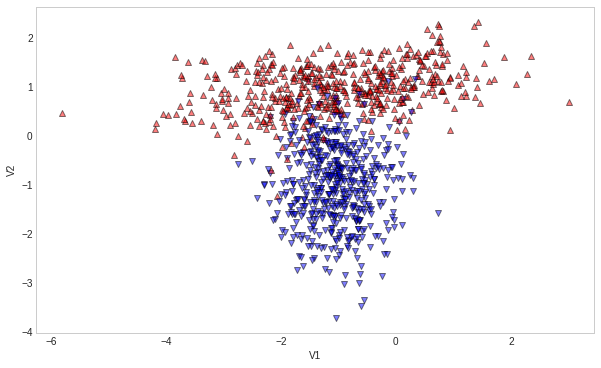

In [42]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.grid()
ax.set_xlabel('V1')
ax.set_ylabel('V2')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(X[i,0], X[i,1], edgecolor='k', alpha = 0.5, marker='^', color='r' )
  else:
    ax.scatter(X[i,0], X[i,1], edgecolor='k', alpha = 0.5, marker='v', color='b' )

plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))
print("W of Regression: {}".format(model.coef_))
print("B of Regression: {}".format(model.intercept_))

Score for the train set: 0.945
Score for the test set: 0.945
W of Regression: [[ 0.49862505 -4.37697378]]
B of Regression: [1.43678157]


In [44]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print("CV score mean: {}".format(scores.mean()))

CV score mean: 0.945


In [45]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), 
                     np.arange(y_min, y_max, 0.02))

# x = np.linspace(1,10,10)
# y = np.linspace(11,20,10)
# X,Y = np.meshgrid(x,y)
# X
# array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
#        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
#        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
#        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
#        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
#        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
#        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
#        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
#        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
#        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])
# Y
# array([[11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
#        [12., 12., 12., 12., 12., 12., 12., 12., 12., 12.],
#        [13., 13., 13., 13., 13., 13., 13., 13., 13., 13.],
#        [14., 14., 14., 14., 14., 14., 14., 14., 14., 14.],
#        [15., 15., 15., 15., 15., 15., 15., 15., 15., 15.],
#        [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
#        [17., 17., 17., 17., 17., 17., 17., 17., 17., 17.],
#        [18., 18., 18., 18., 18., 18., 18., 18., 18., 18.],
#        [19., 19., 19., 19., 19., 19., 19., 19., 19., 19.],
#        [20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]])


In [46]:
Z= model.predict(np.column_stack([xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# a = np.array([1, 2, 3])
# b = np.array([4, 5, 6])
# np.r_[a, b]
# array([1, 2, 3, 4, 5, 6])
# np.hstack([a, b])
# array([1, 2, 3, 4, 5, 6])
# np.concatenate((a, b), axis = 0)
# array([1, 2, 3, 4, 5, 6])

# np.vstack([a, b])
# array([[1, 2, 3],
#         [4, 5, 6]])
# np.c_[a, b]
# np.column_stack([a, b])
# array([[1, 4],
#         [2, 5],
#         [3, 6]])

# c = np.array([[0, 1, 2], [3, 4, 5,]])
# d = np.array([[6, 7, 8], [9, 10, 11]])
# np.concatenate((c, d), axis = 1) 
# array([[ 0,  1,  2,  6,  7,  8],
#         [ 3,  4,  5,  9, 10, 11]])
# np.concatenate((c.T, d.T), axis = 1)
# array([[ 0,  3,  6,  9],
#        [ 1,  4,  7, 10],
#        [ 2,  5,  8, 11]])

# x = np.arange(12).reshape(3, 4)
# array([[ 0, 1, 2, 3],
#         [ 4, 5, 6, 7],
#         [ 8, 9, 10, 11]])
# np.ravel(x, order='C') # by default
# array([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])


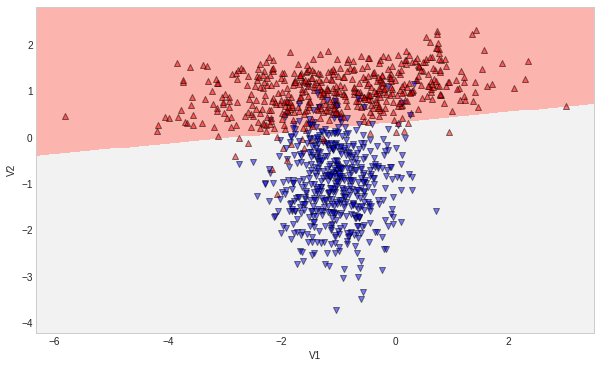

In [51]:
plt.figure(1, figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

for i in range(samples):
  if y[i] == 0:
    plt.scatter(X[i,0], X[i,1], edgecolor='k', alpha = 0.5, marker='^', color='r' )
  else:
    plt.scatter(X[i,0], X[i,1], edgecolor='k', alpha = 0.5, marker='v', color='b' )

plt.xlabel('V1')
plt.ylabel('V2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

In [91]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
species = pd.Series(iris.target, dtype='category')
# species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species 

# 범주형 데이터를 담고 있는 Series는
# 특화된 문자열 메서드인 Series.str과 유사한
# 특수 메서드인 cat 속성이 있다.
# 이를 통해 categories와 codes나 categorical 메서드 등에 쉽게 접근할 수 있다.

# 다시 말해, 시리즈에 바로 categories나 codes를 사용하면 에러가 발생한다.
# 이때 이용하는 것이 cat 속성이다.


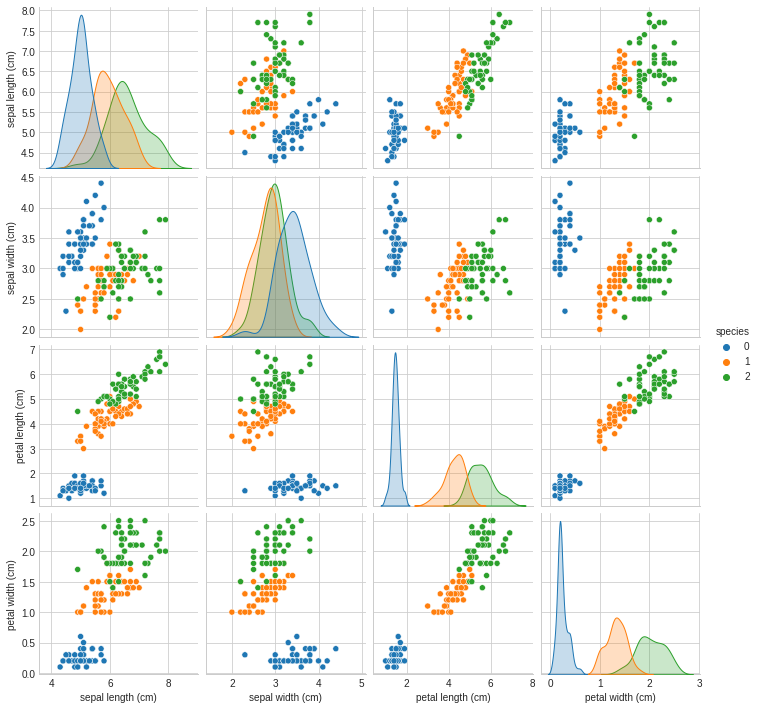

In [93]:
import seaborn as sns
sns.pairplot(iris_df, hue='species');

In [114]:
X_total, y_total = np.array(iris_df[['sepal length (cm)', 'petal width (cm)']]), np.array(iris_df['species'])
X_train, X_test, y_train, y_test = train_test_split(np.array(iris_df[['sepal length (cm)', 'petal width (cm)']]),
                                                    np.array(iris_df['species']),
                                                    test_size=0.2, random_state=1, 
                                                    stratify= np.array(iris_df['species']))

#np.array(iris_df[['sepal length (cm)', 'petal width (cm)']]) 표현 익숙해지기. 

In [95]:
model = LogisticRegression(solver= 'lbfgs', multi_class='auto', C=100, random_state=1)
model.fit(X_train, y_train)

print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))

Score for the train set: 0.9583333333333334
Score for the test set: 0.9666666666666667


In [96]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

In [98]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

# Z= model.predict(np.column_stack([xx1.ravel(), xx2.ravel()]))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

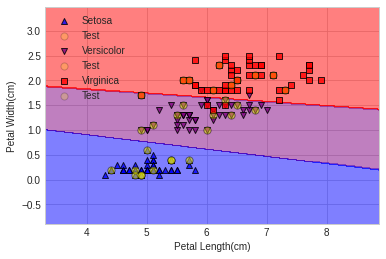

In [110]:
species = ('Setosa', 'Versicolor', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
# 바로 위의 colors 에서 빼 온다. 
plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for index, spec in enumerate(np.unique(y)):
  plt.scatter(X[y==spec,0], X[y==spec, 1],
              alpha=0.8, c=colors[index],
              marker=markers[index], label=species[spec],
              edgecolor='k')
  
  X_comb_test, y_comb_test = X[range(120,150), :], y[range(122,150)]
  plt.scatter(X_comb_test[:,0], X_comb_test[:,1],
              c='yellow', edgecolor='k', alpha=0.2,
              linewidth=1, marker ='o',
              s=50, label='Test')

  
  plt.xlabel('Petal Length(cm)')
  plt.ylabel('Petal Width(cm)')
  plt.legend(loc='upper left')
  plt.tight_layout;


In [119]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'C':[2.0, 2.2, 2.4, 2.6, 2.8]}]
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=10,
                  n_jobs= multiprocessing.cpu_count()) #estimator 뒤에 () 넣는 것 잊지 말기, #cpu 개수 확인하기
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=2,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8]}], scoring='accuracy')

In [120]:
result = gs.fit(X_total, y_total)

In [121]:
print(gs.best_estimator_)
print("최적점수: {}".format(gs.best_score_))
print('최적 파라미터: {}'.format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.0)
최적점수: 0.96
최적 파라미터: {'C': 2.0}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023565,0.003199,0.000602,0.000083,2.0,{'C': 2.0},1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.866667,1.0,1.0,1.0,0.96,0.044222,1
1,0.024052,0.003331,0.000863,0.000847,2.2,{'C': 2.2},1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.866667,1.0,1.0,1.0,0.96,0.044222,1
2,0.021280,0.003057,0.000556,0.000016,2.4,{'C': 2.4},1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.866667,1.0,1.0,1.0,0.96,0.044222,1
3,0.025706,0.004730,0.000573,0.000028,2.6,{'C': 2.6},1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.866667,1.0,1.0,1.0,0.96,0.044222,1
4,0.022423,0.003129,0.000561,0.000079,2.8,{'C': 2.8},1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.866667,1.0,1.0,1.0,0.96,0.044222,1
